# Download The Backbone and Checkpoint

In [1]:
%%capture
#@title
import os
import sys
import tensorflow.compat.v1 as tf

# Download source code.
if "efficientdet" not in os.getcwd():
  !git clone --depth 1 https://github.com/rezabasiri/EfficientDetDFU
  os.chdir('EfficientDetDFU/automl/efficientdet')
  sys.path.append('.')
  !pip install -r requirements.txt
  !pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
else:
  !git pull

In [2]:
ckpt = '20200715-efficientdet-d1-finetune'
MODEL = 'efficientdet-d1'

def download(m):
  if m not in os.listdir():
    !curl -c /tmp/cookies "https://drive.google.com/uc?export=download&id=1ES-0mYRQVTLbAC4SuDWOJCprZ9P7Enpu" > /tmp/intermezzo.html
    !curl -L -b /tmp/cookies "https://drive.google.com$(cat /tmp/intermezzo.html | grep -Po 'uc-download-link" [^>]* href="\K[^"]*' | sed 's/\&amp;/\&/g')" > FINAL_DOWNLOADED_FILENAME.zip
    !unzip FINAL_DOWNLOADED_FILENAME.zip
    !rm -rf FINAL_DOWNLOADED_FILENAME.zip
  ckpt_path = os.path.join(os.getcwd(), m)
  return ckpt_path

# Download checkpoint.
ckpt_path = download(ckpt)
print('Use ckpt in {}'.format(ckpt_path))

# Alternatively access the checkpoint from https://drive.google.com/file/d/11L4jYRgCBUzchWt35SOMc2v_dmgZdxat/view?usp=sharing

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3274    0  3274    0     0  32415      0 --:--:-- --:--:-- --:--:-- 32415
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   5230      0 --:--:-- --:--:-- --:--:--  5230
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 97.6M    0 97.6M    0     0   108M      0 --:--:-- --:--:-- --:--:--  258M
Archive:  FINAL_DOWNLOADED_FILENAME.zip
   creating: 20200715-efficientdet-d1-finetune/
  inflating: 20200715-efficientdet-d1-finetune/model.ckpt-13474.data-00000-of-00001  
  inflating: 20200715-efficientdet-d1-finetune/model.ckpt-19359.data-00000-of-00001  
  inflating: 20200715-efficie

## Prepare The Saved Model

In [4]:
min_score_thresh = 0.60
max_boxes_to_draw = 4
line_thickness = 2

# Export a saved model.
saved_model_dir = 'savedmodel'
!rm -rf {saved_model_dir}
!python model_inspect.py --runmode=saved_model --model_name={MODEL} \
  --ckpt_path={ckpt_path} --saved_model_dir={saved_model_dir} \
  --hparams="num_classes=2,moving_average_decay=0" \

2020-07-25 23:41:48.204476: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-25 23:41:50.138837: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300000000 Hz
2020-07-25 23:41:50.139153: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2073100 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-07-25 23:41:50.139200: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-07-25 23:41:50.143987: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-25 23:41:50.367244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-25 23:41:50.368491: I tensorflow/compiler/xla/servic

In [5]:
serve_image_out = 'serve_image_out'
!mkdir {serve_image_out}

!python model_inspect.py --runmode=saved_model_infer \
  --saved_model_dir={saved_model_dir} \
  --model_name={MODEL}  --input_image="../Example_Image/*.jpg"  \
  --output_image_dir={serve_image_out} \
  --min_score_thresh={min_score_thresh}  --max_boxes_to_draw={max_boxes_to_draw} \
# Returns 1. Serve_Image_Out Folder 2. PredictedTruth.csv File

2020-07-25 23:42:22.786202: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-25 23:42:24.585638: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300000000 Hz
2020-07-25 23:42:24.585831: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x22a3100 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-07-25 23:42:24.585863: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-07-25 23:42:24.587721: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-25 23:42:24.687364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-25 23:42:24.688085: I tensorflow/compiler/xla/servic

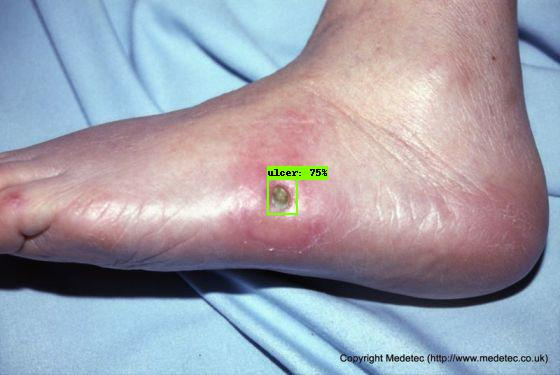

In [6]:
from IPython import display
display.display(display.Image(os.path.join(serve_image_out, 'foot-ulcer-0030.jpg')))